# Assignment 2: CitiBike Data Analysis Notebook
*Andrea Hassler (ah4412)*

In [47]:
import os
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats

## Download file, unzip, and save to PUIdata directory
**Examining data from September 2014**

In [2]:
# download zip file
!curl -O https://s3.amazonaws.com/tripdata/201409-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.8M  100 28.8M    0     0  44.3M      0 --:--:-- --:--:-- --:--:-- 44.3M


In [3]:
# move zip to PUIdata directory
!mv 201409-citibike-tripdata.zip $PUIDATA

In [4]:
# unzip file
!unzip $PUIDATA/201409-citibike-tripdata.zip

Archive:  /nfshome/ah4412/PUIdata/201409-citibike-tripdata.zip
  inflating: 201409-citibike-tripdata.csv  


In [5]:
# move csv to PUIdata directory
!mv 201409-citibike-tripdata.csv $PUIDATA

In [6]:
# check zip file and csv were successfully moved
!ls $PUIDATA

201409-citibike-tripdata.csv  nycwater.csv  times.txt
201409-citibike-tripdata.zip  test.txt


## Reduct dataframe and plot distributions
First, we read in and examine the data.

In [3]:
# read in data with pandas
trips = pd.read_csv(os.getenv("PUIDATA") + "/" + "201409-citibike-tripdata.csv")

In [4]:
# display top rows of dataframe
trips.head(7)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2828,9/1/2014 00:00:25,9/1/2014 00:47:33,386,Centre St & Worth St,40.714948,-74.002345,450,W 49 St & 8 Ave,40.762272,-73.987882,15941,Subscriber,1980.0,1
1,368,9/1/2014 00:00:28,9/1/2014 00:06:36,387,Centre St & Chambers St,40.712733,-74.004607,2008,Little West St & 1 Pl,40.705693,-74.016777,18962,Subscriber,1982.0,1
2,2201,9/1/2014 00:00:40,9/1/2014 00:37:21,386,Centre St & Worth St,40.714948,-74.002345,441,E 52 St & 2 Ave,40.756014,-73.967416,15982,Subscriber,1968.0,1
3,322,9/1/2014 00:00:41,9/1/2014 00:06:03,167,E 39 St & 3 Ave,40.748901,-73.976049,528,2 Ave & E 31 St,40.742909,-73.977061,19081,Subscriber,1961.0,1
4,1693,9/1/2014 00:00:59,9/1/2014 00:29:12,223,W 13 St & 7 Ave,40.737815,-73.999947,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,20836,Subscriber,1978.0,1
5,438,9/1/2014 00:01:18,9/1/2014 00:08:36,474,5 Ave & E 29 St,40.745168,-73.986831,501,FDR Drive & E 35 St,40.744219,-73.971212,18089,Subscriber,1985.0,1
6,860,9/1/2014 00:01:36,9/1/2014 00:15:56,386,Centre St & Worth St,40.714948,-74.002345,2000,Front St & Washington St,40.702551,-73.989402,17160,Subscriber,1990.0,1


In [18]:
trips.shape

(953887, 1)

The only necessary column to answer the question is usertype, so we drop all others.

In [13]:
trips.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
trips.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [6]:
trips.head(7)

,tripduration,usertype
0,2828,Subscriber
1,368,Subscriber
2,2201,Subscriber
3,322,Subscriber
4,1693,Subscriber
5,438,Subscriber
6,860,Subscriber


In [34]:
# Subset to trips less than 24 hours
trips = trips[trips.tripduration < 86400]
trips.shape

(953785, 2)

In [37]:
np.arange(0, 10000, 1000)

array([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])

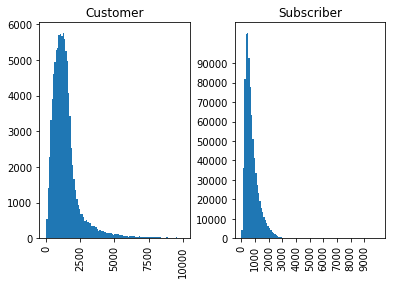

In [45]:
# Create plot of tripduration by user type
# Plot data and save to HW8 directory
trips.hist(column="tripduration",
           by="usertype",
           range=[0, 10000],
           bins=100)
pl.xticks(np.arange(0, 10000, 1000))
pl.yticks(np.arange(0, 100000, 10000))

pl.savefig('/nfshome/ah4412/PUI2018_ah4412/HW8_ah4412/data_plot.png')
pl.show()

**Figure 1:** This plot compares histograms of trip duration for each user type. Both distributions appear skewed right, though the subscriber distribution appears to be centered at a lower trip duration than the customer distribution. There are also far more subscriber trips than customer trips, as indicated by the differences in the y axes.

# Analysis

In [49]:
scipy.stats.ttest_ind(trips.tripduration[trips.usertype == 'Customer'],
                      trips.tripduration[trips.usertype == 'Subscriber'])

Ttest_indResult(statistic=199.9295760659771, pvalue=0.0)

Note: p-value is actually half, since this is a one-tailed test.